In [1]:
import pandas as pd
import re

# Load the CSV
df = pd.read_csv("all_results-1.csv")
df=df[df["num_roots"] == 10] # only those with 10 roots

## save for other analysis
df_single=df.copy()


# Function to extract seq_len, seq_num, alphabet from filename
def extract_file_info(filename):
    # Matches pattern: mglcs_<seq_len>_<seq_num>_<alphabet>_<instance_id>.txt.out
    match = re.match(r"mglcs_(\d+)_(\d+)_(\d+)_\d+\.txt\.out", filename)
    if match:
        seq_len, seq_num, alphabet = match.groups()
        return int(seq_len), int(seq_num), int(alphabet)
    else:
        return None

# Apply function to extract sequence info
df[["seq_len", "seq_num", "alphabet"]] = pd.DataFrame(
    df["file"].apply(extract_file_info).tolist(),
    index=df.index
)

# Define the full group
df["group"] = list(zip(
    df["beam_width"],
    df["heuristic"],
    df["imbs_iters"],
    df["seq_len"],
    df["seq_num"],
    df["alphabet"]
))

# Aggregate by group
agg_df = df.groupby("group").agg(
    avg_quality=("quality", "mean"),
    avg_time=("time", "mean"),
    num_instances=("file", "count")
).reset_index()

# Optional: expand group tuple into separate columns for clarity
agg_df[["beam_width","heuristic","imbs_iters","seq_len","seq_num","alphabet"]] = pd.DataFrame(
    agg_df["group"].tolist(), index=agg_df.index
)

agg_df

,group,avg_quality,avg_time,num_instances,beam_width,heuristic,imbs_iters,seq_len,seq_num,alphabet
0,"(1, h5, 10000, 2, 50, 2)",33.1,0.001603,10,1,h5,10000,2,50,2
1,"(1, h5, 10000, 2, 50, 4)",27.7,0.003239,10,1,h5,10000,2,50,4
2,"(1, h5, 10000, 2, 100, 2)",64.5,0.008758,10,1,h5,10000,2,100,2
3,"(1, h5, 10000, 2, 100, 4)",56.9,0.009691,10,1,h5,10000,2,100,4
4,"(1, h5, 10000, 2, 200, 2)",95.5,0.018208,10,1,h5,10000,2,200,2
...,...,...,...,...,...,...,...,...,...,...
891,"(10000, h8, 1, 10, 100, 4)",2.2,0.005624,10,10000,h8,1,10,100,4
892,"(10000, h8, 1, 10, 200, 2)",2.5,0.014011,10,10000,h8,1,10,200,2
893,"(10000, h8, 1, 10, 200, 4)",2.2,0.015286,10,10000,h8,1,10,200,4
894,"(10000, h8, 1, 10, 500, 2)",1.8,0.081303,10,10000,h8,1,10,500,2


In [2]:
# Assuming agg_df is your aggregated dataframe with the 'group' column
# Expand the tuple into separate columns
agg_df[["beam_width", "heuristic", "imbs_iters", "seq_len", "seq_num", "alphabet"]] = pd.DataFrame(
    agg_df["group"].tolist(), index=agg_df.index
)

# Optional: drop the original 'group' column if you don't need it anymore
agg_df = agg_df.drop(columns=["group"])

agg_df
 

,avg_quality,avg_time,num_instances,beam_width,heuristic,imbs_iters,seq_len,seq_num,alphabet
0,33.1,0.001603,10,1,h5,10000,2,50,2
1,27.7,0.003239,10,1,h5,10000,2,50,4
2,64.5,0.008758,10,1,h5,10000,2,100,2
3,56.9,0.009691,10,1,h5,10000,2,100,4
4,95.5,0.018208,10,1,h5,10000,2,200,2
...,...,...,...,...,...,...,...,...,...
891,2.2,0.005624,10,10000,h8,1,10,100,4
892,2.5,0.014011,10,10000,h8,1,10,200,2
893,2.2,0.015286,10,10000,h8,1,10,200,4
894,1.8,0.081303,10,10000,h8,1,10,500,2


In [3]:
# further analisis (the basic Beam search):
beam_search_results = agg_df[agg_df["imbs_iters"] == 1]
beam_search_results




,avg_quality,avg_time,num_instances,beam_width,heuristic,imbs_iters,seq_len,seq_num,alphabet
32,33.4,0.013189,10,100,h2,1,2,50,2
33,29.9,0.036885,10,100,h2,1,2,50,4
34,44.0,0.039239,10,100,h2,1,2,100,2
35,59.9,0.125474,10,100,h2,1,2,100,4
36,63.7,0.134314,10,100,h2,1,2,200,2
...,...,...,...,...,...,...,...,...,...
891,2.2,0.005624,10,10000,h8,1,10,100,4
892,2.5,0.014011,10,10000,h8,1,10,200,2
893,2.2,0.015286,10,10000,h8,1,10,200,4
894,1.8,0.081303,10,10000,h8,1,10,500,2


In [4]:
beam_search_bw_heuristic = beam_search_results.groupby(["beam_width", "heuristic"]).agg(
    avg_quality=("avg_quality", "mean"),
    avg_time=("avg_time", "mean"),
    num_instances=("avg_quality", "count")
).reset_index()


print('Beam search: baseline with one iteration of IMBS')
beam_search_bw_heuristic

Beam search: baseline with one iteration of IMBS


,beam_width,heuristic,avg_quality,avg_time,num_instances
0,100,h2,24.537500,0.094829,32
1,100,h5,27.337500,0.117270,32
2,100,h8,25.718750,0.134858,32
3,500,h2,27.762500,0.491744,32
4,500,h5,29.875000,0.595383,32
5,500,h8,29.384375,0.589529,32
6,2000,h2,28.840625,1.859473,32
7,2000,h5,30.359375,2.303231,32
8,2000,h8,30.740625,2.277674,32
9,5000,h2,29.303125,4.660717,32


In [5]:
# further analisis (the basic Beam search):
imsbs = agg_df[
    (
        (agg_df["imbs_iters"] > 1) & (agg_df["beam_width"] > 1)
    )
    |
    (
        (agg_df["imbs_iters"] == 100) & (agg_df["beam_width"] == 1)
    )
]

imsbsbw_heuristic = imsbs.groupby(["beam_width", "heuristic"]).agg(
    avg_quality=("avg_quality", "mean"),
    avg_time=("avg_time", "mean"),
    num_instances=("avg_quality", "count")
).reset_index()


print('IMSBS: multiple iterations of IMBS')
imsbsbw_heuristic


IMSBS: multiple iterations of IMBS


,beam_width,heuristic,avg_quality,avg_time,num_instances
0,100,h2,55.646875,4.806009,32
1,100,h5,57.684375,5.496089,32
2,100,h8,56.496875,5.452827,32
3,500,h2,58.218750,20.742818,32
4,500,h5,59.728125,24.630639,32
5,500,h8,58.740625,25.988418,32
6,2000,h2,59.846875,88.253126,32
7,2000,h5,61.006250,95.745489,32
8,2000,h8,59.784375,89.737734,32
9,5000,h2,60.103125,142.629705,32


In [6]:
# TODO: MERGING RESULTS: 

merged_df = pd.merge(
    beam_search_bw_heuristic,
    imsbsbw_heuristic,
    on=["beam_width", "heuristic"],
    how="inner",
    suffixes=("_df1", "_df2")
)

merged_df

,beam_width,heuristic,avg_quality_df1,avg_time_df1,num_instances_df1,avg_quality_df2,avg_time_df2,num_instances_df2
0,100,h2,24.537500,0.094829,32,55.646875,4.806009,32
1,100,h5,27.337500,0.117270,32,57.684375,5.496089,32
2,100,h8,25.718750,0.134858,32,56.496875,5.452827,32
3,500,h2,27.762500,0.491744,32,58.218750,20.742818,32
4,500,h5,29.875000,0.595383,32,59.728125,24.630639,32
5,500,h8,29.384375,0.589529,32,58.740625,25.988418,32
6,2000,h2,28.840625,1.859473,32,59.846875,88.253126,32
7,2000,h5,30.359375,2.303231,32,61.006250,95.745489,32
8,2000,h8,30.740625,2.277674,32,59.784375,89.737734,32
9,5000,h2,29.303125,4.660717,32,60.103125,142.629705,32


In [7]:
#!pip install pandas

In [8]:
### IMSBS WITH BEAM_WIDTH=1 IS MISSING (TODO)

# further analisis (the basic Beam search):
imsbs_greedy = agg_df[agg_df["beam_width"] == 1]

imsbs_greedy_res = imsbs_greedy.groupby(["beam_width", "heuristic"]).agg(
    avg_quality=("avg_quality", "mean"),
    avg_time=("avg_time", "mean"),
    num_instances=("avg_quality", "count")

).reset_index()


print('IMSBS: bw=1')
imsbs_greedy_res

IMSBS: bw=1


,beam_width,heuristic,avg_quality,avg_time,num_instances
0,1,h5,46.821875,394.144194,32


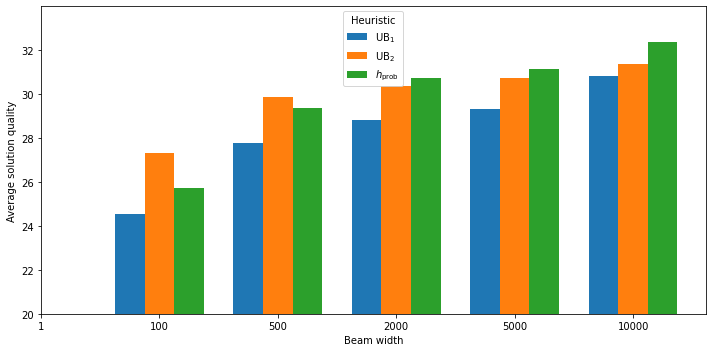

In [21]:
## plots for tuning BS: 
# Sort for consistency
import matplotlib.pyplot as plt 
import numpy as np 


dfx = beam_search_bw_heuristic 
beam_widths = sorted(df["beam_width"].unique())
heuristics = ["h2", "h5", "h8"]

x = np.arange(len(beam_widths))  # must be a NumPy array
bar_width = 0.25

sol_quality_display = True


# LaTeX legend labels
label_map = {
    "h2": r"$\mathrm{UB}_1$",
    "h5": r"$\mathrm{UB}_2$",
    "h8": r"$h_{\mathrm{prob}}$"
}

plt.figure(figsize=(10, 5))

for i, h in enumerate(heuristics):
    values = (
        dfx[dfx["heuristic"] == h]
        .set_index("beam_width")
        .reindex(beam_widths)["avg_quality" if sol_quality_display else "avg_time"]
    )

    plt.bar(
        x + i * bar_width,
        values,
        bar_width,
        label=label_map[h]
    )

plt.xlabel("Beam width")
if sol_quality_display:
    plt.ylabel("Average solution quality")
else:
    plt.ylabel("Average time [s]")

plt.xticks(x + bar_width, beam_widths)
plt.legend(title="Heuristic")

# Cut off y-axis at 25
if sol_quality_display:
    plt.ylim(bottom=20)

plt.tight_layout()
if not sol_quality_display:
    plt.savefig("bs_tuning_time.png")
else:
    plt.savefig("bs_tuning_quality.png")

plt.show()

 

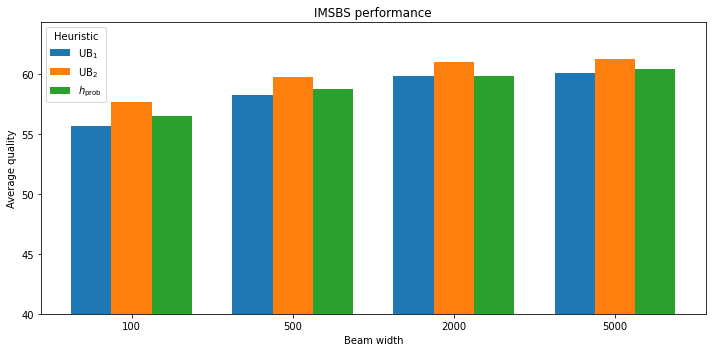

In [10]:
dfx = imsbsbw_heuristic[imsbsbw_heuristic["beam_width"] > 1]

sol_quality = True

beam_widths = sorted(dfx["beam_width"].unique())
heuristics = ["h2", "h5", "h8"]

x = np.arange(len(beam_widths))
bar_width = 0.25

label_map = {
    "h2": r"$\mathrm{UB}_1$",
    "h5": r"$\mathrm{UB}_2$",
    "h8": r"$h_{\mathrm{prob}}$"
}

metric = "avg_quality" if sol_quality else "avg_time"

# ---- KEY FIX: build a complete grid ----
pivot = (
    dfx.pivot(index="beam_width", columns="heuristic", values=metric)
      .reindex(index=beam_widths, columns=heuristics)
      .fillna(0)
)

plt.figure(figsize=(10, 5))

for i, h in enumerate(heuristics):
    plt.bar(
        x + i * bar_width,
        pivot[h].values,
        bar_width,
        label=label_map[h]
    )

plt.title("IMSBS performance")
plt.xlabel("Beam width")
plt.ylabel("Average quality" if sol_quality else "Average time")

# ---- Center tick labels under grouped bars ----
plt.xticks(x + bar_width, beam_widths)

plt.legend(title="Heuristic")

if sol_quality:
    plt.ylim(bottom=40)

plt.tight_layout()
plt.savefig("imsbs_tuning.png" if sol_quality else "imsbs_tuning_time.png")
plt.show()



In [22]:
####### Compare BS vs IMSBS vs IMSBS-Greedy (TUNED RESULTS)

#beam search
bs_results = agg_df [ (agg_df["heuristic"] == "h8")  & (agg_df["beam_width"] == 10000) ][["seq_len", "seq_num", "alphabet", "avg_quality","avg_time"]]
#imsbs-greedy
imsbs_greeedy_results = agg_df [ (agg_df["heuristic"] == "h5")  & (agg_df["beam_width"] == 1)  ][["seq_len", "seq_num", "alphabet", "avg_quality","avg_time"]]
imsbs_greeedy_results
#& (agg_df["imbs_iters"] == 5000) & (agg_df["num_roots"] == 10)

#imsbs
imsbs_results = agg_df [ (agg_df["heuristic"] == "h5") &  (agg_df["beam_width"] == 500) & (agg_df["imbs_iters"] == 100) ][["seq_len", "seq_num", "alphabet", "avg_quality","avg_time"]]
imsbs_greeedy_results


,seq_len,seq_num,alphabet,avg_quality,avg_time
0,2,50,2,33.1,0.001603
1,2,50,4,27.7,0.003239
2,2,100,2,64.5,0.008758
3,2,100,4,56.9,0.009691
4,2,200,2,95.5,0.018208
5,2,200,4,116.1,0.047877
6,2,500,2,153.6,0.073305
7,2,500,4,227.7,0.121716
8,3,50,2,27.2,0.003010
9,3,50,4,21.5,0.004919


In [23]:
#merge results of bs_results, imsbs_results, imsbs_greeedy_results
bs_imsbs_greedy = pd.merge(
    bs_results,
    imsbs_greeedy_results,
    on=["seq_len", "seq_num", "alphabet"],
    how="inner",
    suffixes=("_bs", "_imsbsGreedy")
)

bs_imsbs_imsbs_greedy = pd.merge(
    bs_imsbs_greedy,
    imsbs_results,      
    on=["seq_len", "seq_num", "alphabet"],
    how="inner",
    suffixes=("", "_imsbs")  
)

bs_imsbs_imsbs_greedy = bs_imsbs_imsbs_greedy.round(2)
bs_imsbs_imsbs_greedy#.mean()

,seq_len,seq_num,alphabet,avg_quality_bs,avg_time_bs,avg_quality_imsbsGreedy,avg_time_imsbsGreedy,avg_quality,avg_time
0,2,50,2,33.6,0.02,33.1,0.00,37.7,0.06
1,2,50,4,30.1,0.98,27.7,0.00,30.1,0.16
2,2,100,2,48.9,2.07,64.5,0.01,72.8,0.94
3,2,100,4,62.1,11.19,56.9,0.01,61.6,0.91
4,2,200,2,99.1,18.56,95.5,0.02,136.4,6.21
5,2,200,4,120.5,38.15,116.1,0.05,124.9,6.58
6,2,500,2,65.3,23.27,153.6,0.07,265.7,119.75
7,2,500,4,214.6,163.69,227.7,0.12,294.4,60.49
8,3,50,2,17.5,0.03,27.2,0.00,31.2,0.14
9,3,50,4,21.7,0.18,21.5,0.00,22.9,0.19


In [24]:
bs_imsbs_imsbs_greedy.to_latex("bs_imsbs_imsbs_greedy_results.tex", index=False)
#bs_imsbs_imsbs_greedy
bs_imsbs_imsbs_greedy.mean()


seq_len                      5.000000
seq_num                    212.500000
alphabet                     3.000000
avg_quality_bs              32.375000
avg_time_bs                 11.596250
avg_quality_imsbsGreedy     46.821875
avg_time_imsbsGreedy       394.144063
avg_quality                 59.728125
avg_time                    24.630625
dtype: float64

# 2-VGLCS Problem: Comparison

In [25]:
import pandas as pd

def load_and_process_dp_results(PATH = "results_dp1.csv", aggregate=True):

    dp1 = pd.read_csv(PATH)

    params = (
        dp1["file"]
        .str.replace(".txt.out", "", regex=False)
        .str.replace("mglcs_", "", regex=False)
        .str.split("_", expand=True)
    )

    params.columns = ["m", "n", "alphabet", "index"]
    params = params.astype(int)
        
    if not aggregate:
        return dp1
    
    dp1 = pd.concat([params, dp1.drop(columns=["file"])], axis=1)
    dp1_agg = dp1.groupby(["m", "n", "alphabet"], as_index=False) \
            .agg(quality_mean=("quality", "mean"),  time_mean=("time", "mean")) #, runs=("quality", "count"))
    
    return dp1_agg


In [26]:
dp1_results = load_and_process_dp_results("results_dp1.csv")
dp2_results = load_and_process_dp_results("results_dp2.csv")
dp3_results = load_and_process_dp_results("results_dp3.csv")

KEYS = ["m", "n", "alphabet"]

dp1 = dp1_results.rename(
    columns={c: f"dp1_{c}" for c in dp1_results.columns if c not in KEYS}
)

dp2 = dp2_results.rename(
    columns={c: f"dp2_{c}" for c in dp2_results.columns if c not in KEYS}
)

dp3 = dp3_results.rename(
    columns={c: f"dp3_{c}" for c in dp3_results.columns if c not in KEYS}
)



In [27]:
#merge results:
merged = (
    dp1
    .merge(dp2, on=["m", "n", "alphabet"], how="inner")
    .merge(dp3, on=["m", "n", "alphabet"], how="inner")
)
##ILP results are missing for now
merged

,m,n,alphabet,dp1_quality_mean,dp1_time_mean,dp2_quality_mean,dp2_time_mean,dp3_quality_mean,dp3_time_mean
0,2,50,2,38.1,0.010,38.1,0.010,38.1,0.010
1,2,50,4,30.3,0.010,30.3,0.015,30.3,0.020
2,2,100,2,77.4,0.095,77.4,0.031,77.4,0.047
3,2,100,4,62.3,0.072,62.3,0.061,62.3,0.087
4,2,200,2,156.4,0.745,156.4,0.128,156.4,0.159
5,2,200,4,127.2,0.585,127.2,0.251,127.2,0.319
6,2,500,2,395.9,13.565,395.9,0.841,395.9,1.047
7,2,500,4,317.2,10.179,317.2,1.695,317.2,2.099


In [28]:
merged.to_latex("results_2d.tex", index=False)

In [29]:
## COMPARE optimal DP results with heuristic methods:

##change the titles of bs_imsbs_imsbs_greedy columns:
## seq_len -> m, seq_num -> n  
bs_imsbs_imsbs_greedy = bs_imsbs_imsbs_greedy.rename(
    columns={
        "seq_len": "m",
        "seq_num": "n"
    }
)

bs_imsbs_imsbs_greedy_dp = pd.merge(
    bs_imsbs_imsbs_greedy[['m', 'n', 'alphabet', 'avg_quality_bs', "avg_quality"]],
    merged[['m', 'n', 'alphabet', 'dp2_quality_mean']],
    on=["m", "n", "alphabet"],
    how="inner"
)
bs_imsbs_imsbs_greedy_dp["avg_quality_pct_dp"] = (
    bs_imsbs_imsbs_greedy_dp["avg_quality"] / bs_imsbs_imsbs_greedy_dp["dp2_quality_mean"] * 100
).round(2)

bs_imsbs_imsbs_greedy_dp["avg_quality_bs_pct_dp"] = (
    bs_imsbs_imsbs_greedy_dp["avg_quality_bs"] / bs_imsbs_imsbs_greedy_dp["dp2_quality_mean"] * 100
).round(2)

bs_imsbs_imsbs_greedy_dp = bs_imsbs_imsbs_greedy_dp.drop_duplicates()
bs_imsbs_imsbs_greedy_dp



,m,n,alphabet,avg_quality_bs,avg_quality,dp2_quality_mean,avg_quality_pct_dp,avg_quality_bs_pct_dp
0,2,50,2,33.6,37.7,38.1,98.95,88.19
1,2,50,4,30.1,30.1,30.3,99.34,99.34
2,2,100,2,48.9,72.8,77.4,94.06,63.18
3,2,100,4,62.1,61.6,62.3,98.88,99.68
4,2,200,2,99.1,136.4,156.4,87.21,63.36
5,2,200,4,120.5,124.9,127.2,98.19,94.73
6,2,500,2,65.3,265.7,395.9,67.11,16.49
7,2,500,4,214.6,294.4,317.2,92.81,67.65


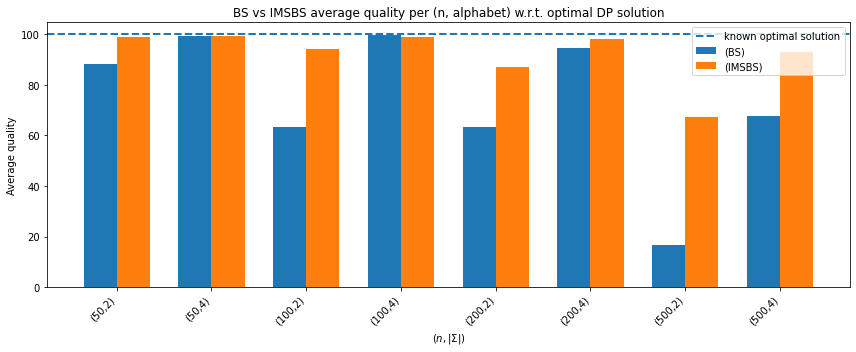

In [30]:
## PLOTTING the quality percentages:

import matplotlib.pyplot as plt
import numpy as np

# assume your dataframe is called df
# df columns: n, alphabet, avg_quality_bs, avg_quality

# create x-axis labels in the given order
x_labels = [f"({n},{a})" for n, a in zip(bs_imsbs_imsbs_greedy_dp["n"], bs_imsbs_imsbs_greedy_dp["alphabet"])]

x = np.arange(len(x_labels))   # positions
width = 0.35                   # bar width

plt.figure(figsize=(12, 5))

# BS bars
plt.bar(
    x - width/2,
    bs_imsbs_imsbs_greedy_dp["avg_quality_bs_pct_dp"],
    width,
    label="(BS)"
)

# IMSBS bars
plt.bar(
    x + width/2,
    bs_imsbs_imsbs_greedy_dp["avg_quality_pct_dp"],
    width,
    label="(IMSBS)"
)

# red dashed line at y = 100
plt.axhline(
    y=100,
    linestyle="--",
    linewidth=2,
    label="known optimal solution"
)

# axis formatting
plt.xticks(x, x_labels, rotation=45, ha="right")
plt.xlabel(r"$(n, |\Sigma|)$")
plt.ylabel("Average quality")
plt.title("BS vs IMSBS average quality per (n, alphabet) w.r.t. optimal DP solution")

# legend
plt.legend()

plt.tight_layout()
plt.savefig("bs_imsbs_vs_dp_quality.png")
plt.show()


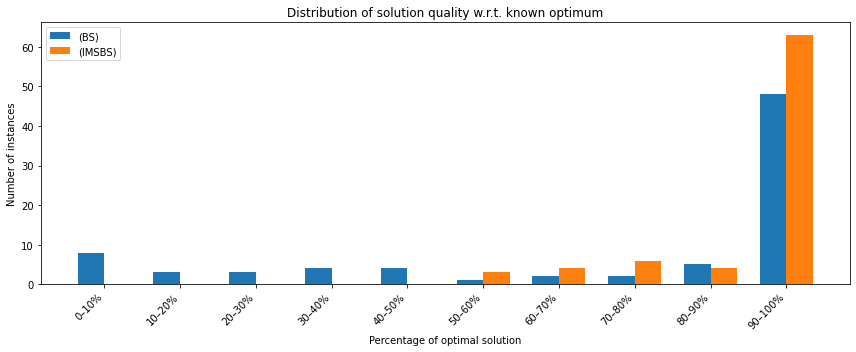

In [31]:
## relative ratio -- single problem instance comparison (beam_search_results vs imsbs_results)

bs_single_results = df_single[  (df_single["imbs_iters"] == 1) & (df_single["beam_width"] == 10000 ) & (df_single["heuristic"] == "h8")]
imsbs_single_results = df_single[  (df_single["imbs_iters"] > 1) 
                                 & (df_single["beam_width"] == 500)
                                 & (df_single["heuristic"] == "h5")]


bs_single_results = bs_single_results[["file", "quality"]]
imsbs_single_results = imsbs_single_results[["file", "quality"]]

#DP single instances:
dp2_single_results = load_and_process_dp_results("results_dp2.csv", aggregate=False)

dp2_single_results

##merge bs_single_results, imsbs_single_results, and dp2_single_results
bs_imsbs_dp_single = pd.merge(
    bs_single_results,
    imsbs_single_results,
    on=["file"],
    how="inner",
    suffixes=("_bs", "_imsbs")
)       
bs_imsbs_dp_single = pd.merge(
    bs_imsbs_dp_single,
    dp2_single_results[["file", "quality"]],      
    on=["file"],
    how="inner",
    suffixes=("", "_dp2")  
)

bs_imsbs_dp_single["quality_pct_dp_bs"] = (
    bs_imsbs_dp_single["quality_bs"] / bs_imsbs_dp_single["quality"] * 100
).round(2)      
bs_imsbs_dp_single["quality_pct_dp_imsbs"] = (
    bs_imsbs_dp_single["quality_imsbs"] / bs_imsbs_dp_single["quality"] * 100
).round(2)      

bs_imsbs_dp_single = bs_imsbs_dp_single.drop_duplicates()


bs_imsbs_dp_single#[bs_imsbs_dp_single["quality_pct_dp_imsbs"] >= 90].count()

# define percentage bins
bins = np.arange(0, 110, 10)   # 0–10, ..., 90–100
bin_labels = [f"{bins[i]}–{bins[i+1]}%" for i in range(len(bins)-1)]

# histogram counts
bs_counts, _ = np.histogram(bs_imsbs_dp_single["quality_pct_dp_bs"], bins=bins)
imsbs_counts, _ = np.histogram(bs_imsbs_dp_single["quality_pct_dp_imsbs"], bins=bins)

x = np.arange(len(bin_labels))
width = 0.35

plt.figure(figsize=(12, 5))

# BS bars
plt.bar(
    x - width/2,
    bs_counts,
    width,
    label="(BS)"
)

# IMSBS bars
plt.bar(
    x + width/2,
    imsbs_counts,
    width,
    label="(IMSBS)"
)

# axis formatting
plt.xticks(x, bin_labels, rotation=45, ha="right")
plt.xlabel("Percentage of optimal solution")
plt.ylabel("Number of instances")
plt.title("Distribution of solution quality w.r.t. known optimum")

plt.legend()
plt.tight_layout()
plt.savefig("bs_imsbs_vs_dp_quality_distribution.png")
plt.show()

